## Synthesis Data

In [1]:
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = np.random.normal(0, 1, 1000)
y = np.sin(2*x) + np.random.normal(0, 0.1, 1000)

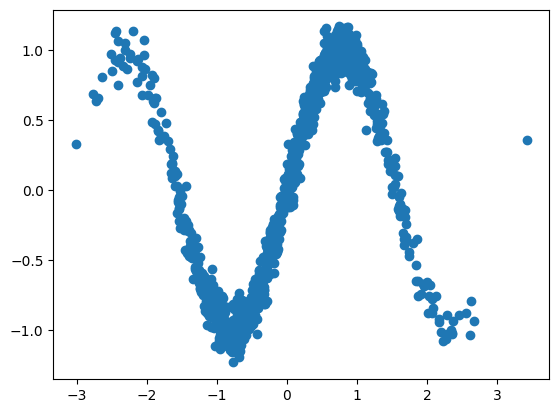

In [3]:
plt.scatter(x, y)
plt.show()

## Simulation with tensorflow

Assuming $$\hat{y}=\beta_0+\beta_1x$$

In [4]:
W1 = tf.Variable(0.0, name = "W1")
W2 = tf.Variable(0.0, name = "W2")
W3 = tf.Variable(0.0, name = "W3")
b = tf.Variable(0.0, name = "b")

In [5]:
lr = 0.001
epochs = 10000

In [6]:
def mse_model(x, y, b0, b1, b2, b3):
    predy = b0 + b1*x + b2*(x**2) + b3*(x**3)
    error = (predy - y)**2

    return tf.reduce_mean(error)

def gradient_lr(x, y, b0, b1, b2, b3):
    with tf.GradientTape() as tape:
        loss = mse_model(x, y, b0, b1, b2, b3)
        
    return tape.gradient(loss, [b3, b2, b1, b0])

In [7]:
for e in range(0, epochs+1):
    db3, db2, db1, db0 = gradient_lr(x, y, b, W1, W2, W3)

    W3.assign_sub(db3*lr)
    W2.assign_sub(db2*lr)
    W1.assign_sub(db1*lr)
    b.assign_sub(db0*lr)

    if e % 1000 == 0:
        loss = mse_model(x, y, b, W1, W2, W3)
        print('Epoch ', e, '; Loss: ',loss)

Epoch  0 ; Loss:  tf.Tensor(0.5191181, shape=(), dtype=float32)
Epoch  1000 ; Loss:  tf.Tensor(0.27773526, shape=(), dtype=float32)
Epoch  2000 ; Loss:  tf.Tensor(0.21942319, shape=(), dtype=float32)
Epoch  3000 ; Loss:  tf.Tensor(0.20481011, shape=(), dtype=float32)
Epoch  4000 ; Loss:  tf.Tensor(0.20114382, shape=(), dtype=float32)
Epoch  5000 ; Loss:  tf.Tensor(0.20022354, shape=(), dtype=float32)
Epoch  6000 ; Loss:  tf.Tensor(0.19999251, shape=(), dtype=float32)
Epoch  7000 ; Loss:  tf.Tensor(0.19993451, shape=(), dtype=float32)
Epoch  8000 ; Loss:  tf.Tensor(0.19991994, shape=(), dtype=float32)
Epoch  9000 ; Loss:  tf.Tensor(0.19991629, shape=(), dtype=float32)
Epoch  10000 ; Loss:  tf.Tensor(0.1999154, shape=(), dtype=float32)


In [8]:
value = tf.get_static_value(W3*(x**3)+W2*(x**2)+W1*x+b)

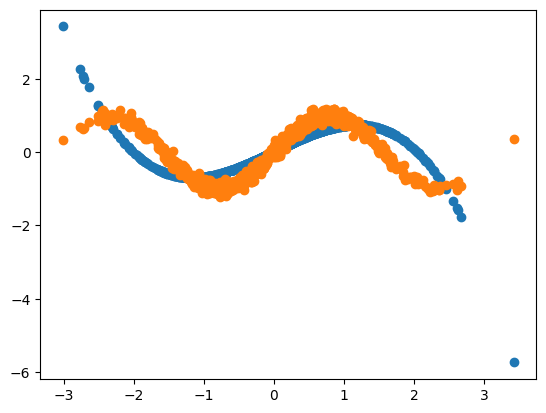

In [9]:
plt.scatter(x, value)
plt.scatter(x, y)

## Basic function

In [2]:
import torch
import math
from torch import nn

In [4]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [108]:
# Fixed Synthesis data
p = torch.tensor([0, 1, 2, 3])
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
xx = x.unsqueeze(-1).pow(p)
n = len(x)

criterion = torch.nn.MSELoss(reduction='sum')

In [109]:
def loss_fn(output, target, ps, lmda):
    ls = criterion(output, target)
    dm = diag_mat(ps)
    penalty = (lmda/len(target)) * np.sum(np.square(dm @ ps))
    return ls + penalty

In [110]:
def diag_mat(ps):
    dg = np.zeros((len(ps)-1, len(ps)))
    for i in range(len(ps)-1):
        dg[i,i] = -1
        dg[i,i+1]= 1
    return dg

### OLS

In [111]:
modelols = Polynomial3()
optimizer = torch.optim.SGD(modelols.parameters(), lr=1e-6)
for t in range(10000):
    # Forward pass: Compute predicted y by passing x to the modelols
    y_pred = modelols(x)
    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {modelols.string()}')

99 600.7758178710938
199 401.8641357421875
299 269.864013671875
399 182.244384765625
499 124.06945037841797
599 85.43319702148438
699 59.76646423339844
799 42.710472106933594
899 31.372867584228516
999 23.8338680267334
1099 18.818920135498047
1199 15.481771469116211
1299 13.260190963745117
1399 11.780601501464844
1499 10.794790267944336
1599 10.137645721435547
1699 9.69937515258789
1799 9.406920433044434
1899 9.211669921875
1999 9.0812349319458
2099 8.99405574798584
2199 8.935735702514648
2299 8.89670181274414
2399 8.870563507080078
2499 8.853043556213379
2599 8.841291427612305
2699 8.833405494689941
2799 8.828105926513672
2899 8.824542999267578
2999 8.822145462036133
3099 8.82052993774414
3199 8.819441795349121
3299 8.818707466125488
3399 8.818211555480957
3499 8.817875862121582
3599 8.817647933959961
3699 8.817495346069336
3799 8.817388534545898
3899 8.8173189163208
3999 8.81727123260498
4099 8.817237854003906
4199 8.817214965820312
4299 8.817200660705566
4399 8.81718921661377
4499 8

### SPLINE

In [112]:
modelsp = Polynomial3()
optimizer = torch.optim.SGD(modelsp.parameters(), lr=1e-6)
lambda2 = 0.5

for t in range(10000):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred = modelsp(x)
    
    # parameter space
    param_ls = []
    for param in modelsp.parameters():
        param_ls.append(param.detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = loss_fn(y, y_pred, param_ls, lambda2)

    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f'Result: {modelsp.string()}')

99 4333.36474609375
199 2932.309326171875
299 1987.1845703125
399 1349.0047607421875
499 917.6554565429688
599 625.8073120117188
699 428.1390380859375
799 294.1167907714844
899 203.14907836914062
999 141.33702087402344
1099 99.28913116455078
1199 70.65377807617188
1299 51.13047409057617
1399 37.80453109741211
1499 28.69813346862793
1599 22.468114852905273
1699 18.201045989990234
1799 15.275029182434082
1899 13.266366004943848
1999 11.885852813720703
2099 10.935995101928711
2199 10.281722068786621
2299 9.830571174621582
2399 9.519136428833008
2499 9.303922653198242
2599 9.155048370361328
2699 9.051960945129395
2799 8.980504035949707
2899 8.930930137634277
2999 8.896505355834961
3099 8.87257194519043
3199 8.855924606323242
3299 8.84433364868164
3399 8.836255073547363
3499 8.830620765686035
3599 8.826687812805176
3699 8.823943138122559
3799 8.822023391723633
3899 8.82068157196045
3999 8.819741249084473
4099 8.819083213806152
4199 8.818621635437012
4299 8.81829833984375
4399 8.818071365356

### Comparison

In [113]:
predols = modelols(x)
predsp = modelsp(x)

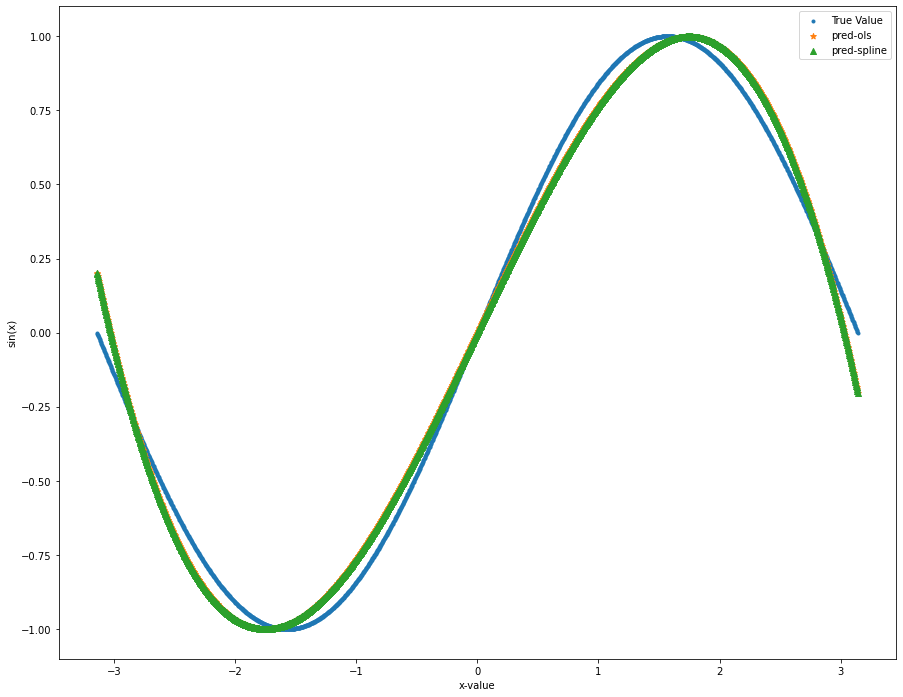

In [114]:
plt.figure(figsize = (15,12))
plt.scatter(x, y, marker = '.', label = 'True Value')
plt.scatter(x, predols.detach().numpy(), marker = '*', label = 'pred-ols')
plt.scatter(x, predsp.detach().numpy(), marker = '^', label = 'pred-spline')

plt.xlabel("x-value")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

## Customized 

In [115]:
class Multilayer(nn.Module):
    def __init__(self, input_sample, output_sample):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu = nn.Sequential(
            nn.Linear(input_sample, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, output_sample),
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu(x)
        return logits
    
    

In [116]:
x = torch.reshape(x, (n, 1))

In [117]:
def loss_fn(output, target, ps, lmda):

    output = torch.reshape(output, (len(target),1))
    ls = criterion(output, target)
    penalty = 0 
    for mat in ps:
        dm = diag_mat(mat)
        penalty += (lmda/len(target)) * np.sum(np.square(dm @ mat))

    return ls + penalty

In [118]:
multi_model = Multilayer(input_sample = 1, output_sample = 1)
optimizer = torch.optim.SGD(multi_model.parameters(), lr=1e-5)
lambda2 = 0.5

for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred = multi_model(x)
    
    # parameter space
    param = list(multi_model.parameters())
    pspace = len(param)
    param_ls = []

    for i in range(pspace-1):
        if i % 2 == 1:
            param_ls.append(param[i].detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = loss_fn(y, y_pred, param_ls, lambda2)

    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#print(f'Result: {multi_model.string()}')
print(f'Result: Done')

99 95.20426177978516
199 34.342647552490234
299 18.522106170654297
399 11.330499649047852
499 7.692500591278076
599 5.44908332824707
699 4.081064224243164
799 3.1509201526641846
899 2.492191791534424
999 2.0132393836975098
1099 1.656554102897644
1199 1.3853389024734497
1299 1.1752663850784302
1399 1.0097224712371826
1499 0.8768640160560608
1599 0.7684686779975891
1699 0.678755521774292
1799 0.6036041378974915
1899 0.540037214756012
1999 0.48579075932502747
Result: Done


In [122]:
predcus = multi_model(x)

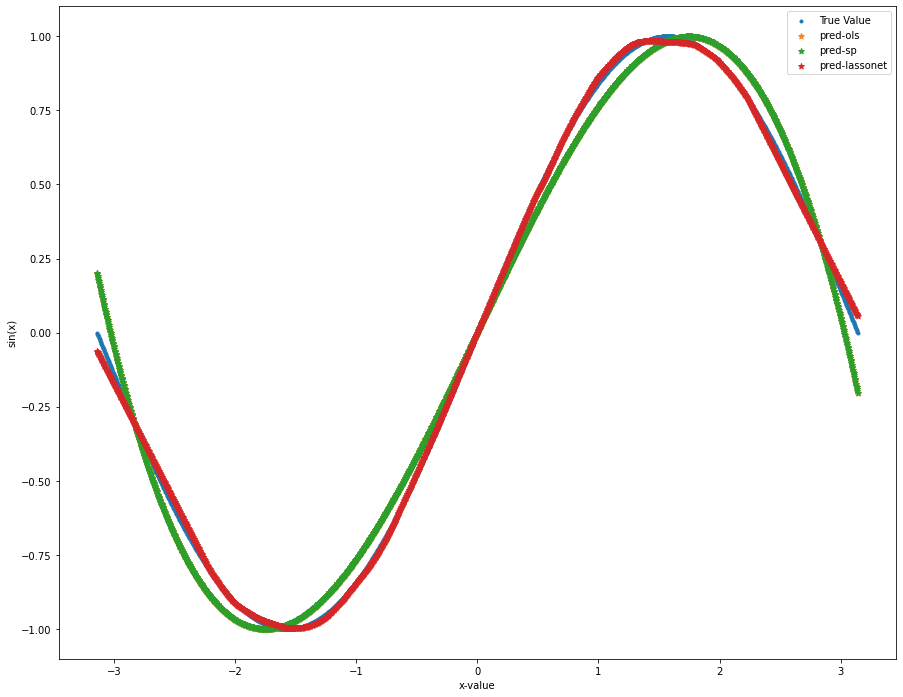

In [123]:
plt.figure(figsize = (15,12))
plt.scatter(x, y, marker = '.', label = 'True Value')
plt.scatter(x, predols.detach().numpy(), marker = '*', label = 'pred-ols')
plt.scatter(x, predsp.detach().numpy(), marker = '*', label = 'pred-sp')
plt.scatter(x, predcus.detach().numpy(), marker = '*', label = 'pred-lassonet')

plt.xlabel("x-value")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

The plot is consisted of three different experiments with respected to ordinary least square (Poly), the polynomial with customized loss function, and lassonet with customized loss function. According to the previous two experiments, they ran for 10000 loops. As for the last, it only ran 2000 loops and reach better performance.

Runtime:
1. 1.8s (10000 loops)
2. 2.2s (10000 loops)
3. 9.2s (2000 loops)